In [1]:
%load_ext autoreload
%autoreload 2

# Picturing vectors in three-dimensional space

## 3D Drawing in Python

In [2]:
from draw3d import *

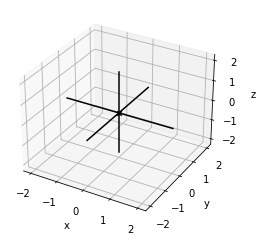

In [3]:
draw3d()

e:\workspaceLMZ\Math-for-Programmers\Chapter 03\draw3d.py:19: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


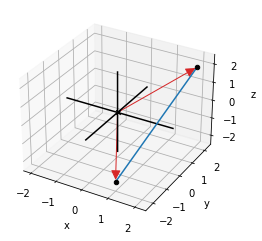

In [4]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2))
)

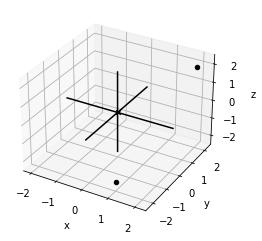

In [5]:
draw3d(
    Points3D((2,2,2),(1,-2,-2))
)

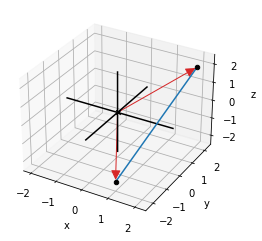

In [6]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2))
)

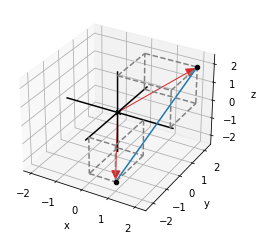

In [7]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2)),
    Box3D(2,2,2),
    Box3D(1,-2,-2)
)

## Exercises

**Exercise:** Draw the 3D arrow and point representing the coordinates $(-1,-2,2)$, as well as the dashed box that makes the arrow look 3D.  Do this drawing by hand as practice, but from now on we’ll use Python to draw for us.

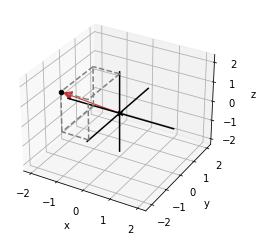

In [8]:
v = (-1,-2,2)
draw3d(
    Points3D(v),
    Arrow3D(v),
    Box3D(*v)
)

**Mini project:** There are eight 3D vectors that have every coordinate equal to $+1$ or $-1$.  For instance, $(1,-1,1)$ is one of them.  Plot all of these eight vectors as points.  Then, figure out how to connect them with line segments (using `Segment3D` objects) to form the outline of a cube.  Hint: you’ll need 12 segments in total.

In [9]:
pm1 = [1,-1]

In [10]:
vertices = [(x,y,z) for x in pm1 for y in pm1 for z in pm1]

In [11]:
edges = [((-1,y,z),(1,y,z)) for y in pm1 for z in pm1] +\
                [((x,-1,z),(x,1,z)) for x in pm1 for z in pm1] +\
                [((x,y,-1),(x,y,1)) for x in pm1 for y in pm1]

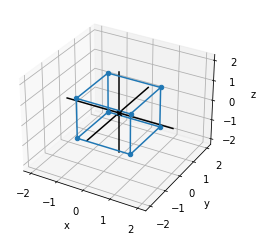

In [12]:
draw3d(
    Points3D(*vertices,color=blue),
    *[Segment3D(*edge) for edge in edges]
)

# Vector arithmetic in 3D

## Adding 3D vectors

In [13]:
def add(*vectors):
    by_coordinate = zip(*vectors)
    coordinate_sums = [sum(coords) for coords in by_coordinate]
    return tuple(coordinate_sums)

In [14]:
list(zip(*[(1,1,3),(2,4,-4),(4,2,-2)]))

[(1, 2, 4), (1, 4, 2), (3, -4, -2)]

In [15]:
[sum(coords) for coords in [(1, 2, 4), (1, 4, 2), (3, -4, -2)]]

[7, 7, -3]

In [16]:
def add(*vectors):
    return tuple(map(sum,zip(*vectors)))

In [17]:
add((1,1,3),(2,4,-4),(4,2,-2))

(7, 7, -3)

## Computing lengths and distances

In [18]:
from math import sqrt
def length(v):
    return sqrt(sum([coord ** 2 for coord in v]))

In [19]:
length((3,4,12))

13.0

## Exercises

**Exercise:** Draw $(4,0,3)$ and $(-1,0,1)$ as Arrow3D objects, such that they are placed tip-to-tail in both orders in 3D.  What is their vector sum?

In [20]:
add((4,0,3),(-1,0,1))

(3, 0, 4)

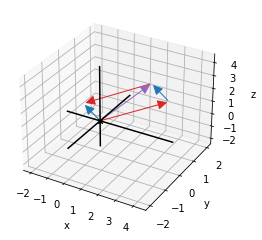

In [21]:
draw3d(
    Arrow3D((4,0,3),color=red),
    Arrow3D((-1,0,1),color=blue),
    Arrow3D((3,0,4),(4,0,3),color=blue),
    Arrow3D((-1,0,1),(3,0,4),color=red),
    Arrow3D((3,0,4),color=purple)
)

**Exercise:** Suppose we set `vectors1=[(1,2,3,4,5), (6,7,8,9,10)]` and `vectors2=[(1,2), (3,4), (5,6)]`.  Without evaluating in Python, what are the results of `len(zip(*vectors1))` and `len(zip(*vectors2))`?

In [22]:
vectors1=[(1,2,3,4,5), (6,7,8,9,10)]

In [23]:
vectors2=[(1,2), (3,4), (5,6)]

In [24]:
len(list(zip(*vectors1)))

5

In [25]:
len(list(zip(*vectors2)))

2

**Mini project:** The comprehension below creates a list of 24 Python vectors
```
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
```
What is the sum of the 24 vectors?  Draw all 24 of them tip-to-tail as Arrow3D objects.

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


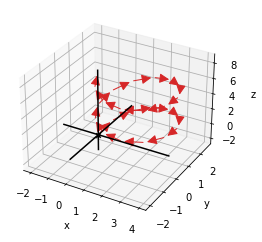

In [26]:
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]

running_sum = (0,0,0) #<1>
arrows = []
for v in vs:
    next_sum = add(running_sum, v) #2
    arrows.append(Arrow3D(next_sum, running_sum)) 
    running_sum = next_sum
print(running_sum)
draw3d(*arrows)

**Exercise:** Write a function `scale(scalar,vector)` that returns the input scalar times the input vector.  Specifically, write it so it works on 2D or 3D vectors, or vectors of any number of coordinates.

In [27]:
def scale(scalar,v):
    return tuple(scalar * coord for coord in v)

**Mini project:** The coordinates 3, 4, 12 in any order create a vector of length 13, a whole number. This is unusual because most numbers are not perfect squares, so the square root in the length formula typically returns an irrational number.  Find a different triple of whole numbers that define coordinates of a vector with whole number length.

In [28]:
def vectors_with_whole_number_length(max_coord=100):
    for x in range(1,max_coord):
        for y in range(1,x+1):
            for z in range(1,y+1):
                if length((x,y,z)).is_integer():
                    yield (x,y,z)

In [29]:
list(vectors_with_whole_number_length())

[(2, 2, 1),
 (4, 4, 2),
 (6, 3, 2),
 (6, 6, 3),
 (7, 4, 4),
 (7, 6, 6),
 (8, 4, 1),
 (8, 8, 4),
 (9, 6, 2),
 (10, 10, 5),
 (11, 10, 2),
 (12, 4, 3),
 (12, 6, 4),
 (12, 9, 8),
 (12, 12, 1),
 (12, 12, 6),
 (14, 5, 2),
 (14, 8, 8),
 (14, 12, 12),
 (14, 14, 7),
 (15, 10, 6),
 (16, 8, 2),
 (16, 11, 8),
 (16, 13, 4),
 (16, 15, 12),
 (16, 16, 8),
 (17, 6, 6),
 (18, 6, 1),
 (18, 9, 6),
 (18, 12, 4),
 (18, 13, 6),
 (18, 14, 3),
 (18, 18, 9),
 (19, 8, 4),
 (20, 5, 4),
 (20, 12, 9),
 (20, 20, 10),
 (20, 20, 17),
 (21, 12, 12),
 (21, 16, 12),
 (21, 18, 14),
 (21, 18, 18),
 (22, 6, 3),
 (22, 14, 7),
 (22, 20, 4),
 (22, 21, 6),
 (22, 22, 11),
 (23, 10, 10),
 (23, 14, 2),
 (24, 8, 6),
 (24, 12, 3),
 (24, 12, 8),
 (24, 12, 11),
 (24, 16, 3),
 (24, 18, 16),
 (24, 24, 2),
 (24, 24, 12),
 (24, 24, 23),
 (25, 10, 2),
 (25, 20, 8),
 (26, 7, 2),
 (26, 18, 15),
 (26, 22, 19),
 (26, 26, 13),
 (27, 14, 6),
 (27, 18, 6),
 (27, 24, 8),
 (28, 10, 4),
 (28, 16, 7),
 (28, 16, 16),
 (28, 17, 4),
 (28, 21, 12),
 (28,

**Exercise:** Find a vector in the same direction as $(-1,-1,2)$ but which has length 1.  Hint: find the appropriate scalar to multiply the original vector to change its length appropriately.

In [30]:
length((-1,-1,2))

2.449489742783178

In [31]:
s = 1/length((-1,-1,2))

In [32]:
scale(s,(-1,-1,2))

(-0.4082482904638631, -0.4082482904638631, 0.8164965809277261)

In [33]:
length(scale(s,(-1,-1,2)))

1.0

# The dot product: measuring alignment of vectors

## Computing the dot product

In [34]:
def dot(u,v):
    return sum([coord1 * coord2 for coord1,coord2 in zip(u,v)])

## Dot products by example

In [35]:
dot((1,0),(0,2))

0

In [36]:
dot((0,3,0),(0,0,-5))

0

In [37]:
dot((3,4),(2,3))

18

In [38]:
dot(scale(2,(3,4)),(2,3))

36

In [39]:
dot((3,4),scale(2,(2,3)))

36

In [40]:
dot((4,3),(8,6))

50

## Measuring angles with the dot product

In [41]:
from math import cos,pi

In [42]:
3 * 2 * cos(75 * pi / 180)

1.5529142706151244

In [43]:
def angle_between(v1,v2):
    return acos(
                dot(v1,v2) /
                (length(v1) * length(v2))
            )

**Mini project:** Find a vector $\vec{u}$ of length 3 and a vector $\vec{v}$ of length 7, such that $\vec{u} \cdot \vec{v} = 21$.  Find another pair of vectors $\vec{u}$ and $\vec{v}$ such that $\vec{u} \cdot \vec{v} = -21$.  Finally, find three more pairs of vectors of respective lengths 3 and 7 and show that all of their lengths lie between -21 and 21.

In [44]:
dot((3,0),(7,0))

21

In [45]:
dot((0,3),(0,-7))

-21

In [46]:
from vectors import to_cartesian
from random import random
from math import pi

def random_vector_of_length(l):
    return to_cartesian((l, 2*pi*random()))

pairs = [(random_vector_of_length(3), random_vector_of_length(7))
            for i in range(0,3)]
for u,v in pairs:
    print("u = %s, v = %s" % (u,v))
    print("length of u: %f, length of v: %f, dot product :%f" %
                (length(u), length(v), dot(u,v)))

u = (2.9991369450192535, 0.07195543774154813), v = (6.907351934913761, 1.135116402508185)
length of u: 3.000000, length of v: 7.000000, dot product :20.797772
u = (-2.502992482275021, -1.65379219785157), v = (-3.2724437623290203, -6.18798123966079)
length of u: 3.000000, length of v: 7.000000, dot product :18.424537
u = (2.6598325486290157, -1.387548490415263), v = (5.366067569520481, -4.495032685013599)
length of u: 3.000000, length of v: 7.000000, dot product :20.509917


**Exercise:** Let $\vec{u}$ and $\vec{v}$ be vectors, with $|\vec{u}| = 3.61$ and $|\vec{v}| = 1.44$.  If the angle between $\vec{u}$ and $\vec{v}$ is 101.3 degrees, what is $\vec{u} ∙ \vec{v}$?

In [47]:
3.61 * 1.44 * cos(101.3 * pi / 180)

-1.0186064362303022

**Mini Project:** Find the angle between $(3,4)$ and $(4,3)$ by converting them to polar coordinates and taking the difference of the angles.  

In [48]:
from vectors import to_polar
r1,t1 = to_polar((4,3))
r2,t2 = to_polar((3,4))
t1-t2

-0.2837941092083278

In [49]:
t2-t1

0.2837941092083278

# The cross product: measuring oriented area

## Computing the cross product of 3D vectors

In [50]:
def cross(u, v):
    ux,uy,uz = u
    vx,vy,vz = v
    return (uy*vz - uz*vy, uz*vx - ux*vz, ux*vy - uy*vx)

## Exercises

**Exercise:** Use the Python cross function to compute $(0,0,1) \times \vec{v}$ for a few different values of a second vector $\vec{v}$.  What is the $z$-coordinate of each result, and why?

In [51]:
cross((0,0,1),(1,2,3))

(-2, 1, 0)

In [52]:
cross((0,0,1),(-1,-1,0))

(1, -1, 0)

In [53]:
cross((0,0,1),(1,-1,5))

(1, 1, 0)

# Rendering a 3D object in 2D

## Defining a 3D object with vectors

In [54]:
octahedron = [
    [(1,0,0), (0,1,0), (0,0,1)],
    [(1,0,0), (0,0,-1), (0,1,0)],
    [(1,0,0), (0,0,1), (0,-1,0)],
    [(1,0,0), (0,-1,0), (0,0,-1)],
    [(-1,0,0), (0,0,1), (0,1,0)],
    [(-1,0,0), (0,1,0), (0,0,-1)],
    [(-1,0,0), (0,-1,0), (0,0,1)],
    [(-1,0,0), (0,0,-1), (0,-1,0)],
]

In [55]:
def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))

In [56]:
def component(v,direction):
    return (dot(v,direction) / length(direction))

In [57]:
def vector_to_2d(v):
    return (component(v,(1,0,0)), component(v,(0,1,0)))

In [58]:
def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

## Orienting faces and shading

In [59]:
blues = matplotlib.cm.get_cmap('Blues')

In [60]:
def unit(v):
    return scale(1./length(v), v)

In [61]:
def normal(face):
    return(cross(subtract(face[1], face[0]), subtract(face[2], face[0])))

In [62]:
from vectors import *
from draw2d import *

In [63]:
def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face)) #1
        if unit_normal[2] > 0: #2
            c = color_map(1 - dot(unit(normal(face)), unit(light))) #3
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines) #4
            polygons.append(p)
    draw2d(*polygons,axes=False, origin=False, grid=None)

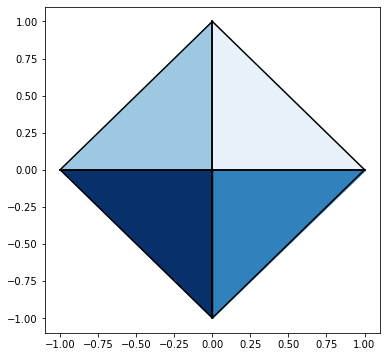

In [64]:
render(octahedron, color_map=matplotlib.cm.get_cmap('Blues'), lines=black)

In [65]:
def split(face):
    midpoints = [unit(add(face[i], face[(i+1)%len(face)])) for i in range(0,len(face))]
    triangles = [(face[i], midpoints[i], midpoints[(i-1)%len(face)]) for i in range(0,len(face))]
    return [midpoints] + triangles

def rec_split(faces, depth=0):
    if depth == 0:
        return faces
    else:
        return rec_split([new_face for face in faces for new_face in split(face)], depth-1)

# NICE SPHERE!
def sphere_approx(n):
    return rec_split(octahedron,n)

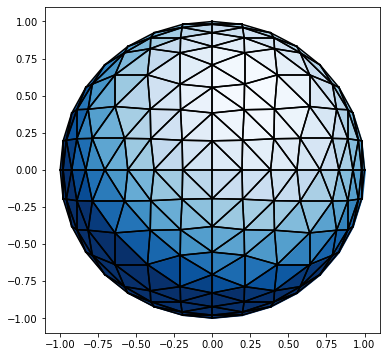

In [66]:
render(sphere_approx(3), lines='k')

## Exercises

**Mini project:** Find pairs of vectors defining each of the 12 edges of the octahedron, and draw all of the edges in Python.

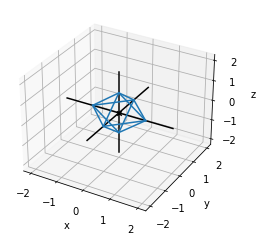

In [67]:
top = (0,0,1)
bottom = (0,0,-1)
xy_plane = [(1,0,0),(0,1,0),(-1,0,0),(0,-1,0)]
edges = [Segment3D(top,p) for p in xy_plane] +\
            [Segment3D(bottom, p) for p in xy_plane] +\
            [Segment3D(xy_plane[i],xy_plane[(i+1)%4]) for i in range(0,4)] 
draw3d(*edges)